<a href="https://colab.research.google.com/github/techwithanirudh/Automatic-Image-Captioning/blob/master/DeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r sample_data
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 8.0MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


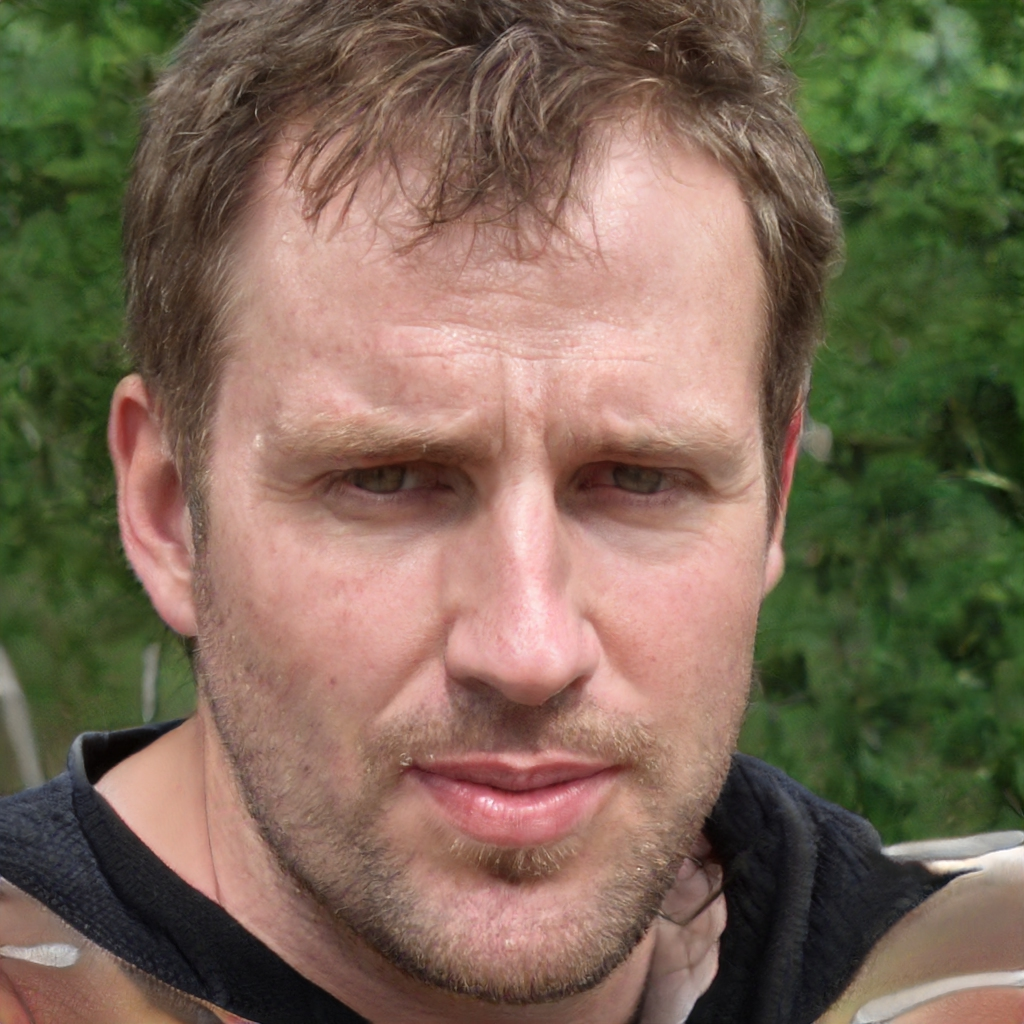

In [3]:
import requests 

image_link = 'https://www.thispersondoesnotexist.com/image'
r = requests.get(image_link).content 

with open('person.jpg', 'wb+') as f: 
	f.write(r) 

from IPython.display import Image
Image('person.jpg')

In [4]:
prompt = input("Ask this person a question: ")

import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

driver.get("http://textsynth.org/")
driver.implicitly_wait(10)

inputElement = driver.find_element_by_id('input_text')
inputElement.click()
inputElement.clear()
inputElement.send_keys(prompt)
button = driver.find_element_by_id('submit_button')
ActionChains(driver).move_to_element(button).click(button).perform()
time.sleep(10)

responseElement = driver.find_element_by_id('gtext')
response = responseElement.text
response = response[len(prompt):].replace('\n', ' ')
print(response)

Ask this person a question: how much is 100 + 56
 = 125% and what is 95 + 55 = 90%?', so I can


In [5]:
!git clone https://github.com/NVIDIA/flowtron.git
%cd flowtron
!git submodule update --init
%cd tacotron2
!git submodule update --init
%cd ..

# Create a virtual env so we can run different versions of packages 
# required for different repositories used in this notebook.
!pip install virtualenv
!virtualenv flowtronenv
!source flowtronenv/bin/activate; pip install numpy==1.16.4 inflect==0.2.5 librosa==0.6.0 scipy==1.0.0 tensorboardX==1.1 Unidecode==1.0.22 pillow matplotlib numba==0.48; pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Download the pre-trained models.
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!mkdir models
!python gfile.py -u 'https://drive.google.com/open?id=1KhJcPawFgmfvwV7tQAOeC253rYstLrs8' -f 'models/flowtron_libritts.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Cjd6dK_eFz6DE0PKXKgKxrzTUqzzUDW-' -f 'models/flowtron_ljs.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Rm5rV5XaWWiUbIpg5385l5sh68z2bVOE' -f 'models/waveglow_256channels_v4.pt'


Cloning into 'flowtron'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 192 (delta 6), reused 9 (delta 4), pack-reused 174
Receiving objects: 100% (192/192), 2.82 MiB | 5.81 MiB/s, done.
Resolving deltas: 100% (78/78), done.
/content/flowtron
Submodule 'apex' (https://github.com/NVIDIA/apex) registered for path 'apex'
Submodule 'tacotron2' (https://github.com/NVIDIA/tacotron2) registered for path 'tacotron2'
Cloning into '/content/flowtron/apex'...
Cloning into '/content/flowtron/tacotron2'...
Submodule path 'apex': checked out '9165b27fdf240f9bc08eac98b849a9d7c6308917'
Submodule path 'tacotron2': checked out '6f435f7f29c3e1553cf2dd7ca2daf56903b20c39'
/content/flowtron/tacotron2
Submodule 'waveglow' (https://github.com/NVIDIA/waveglow) registered for path 'waveglow'
Cloning into '/content/flowtron/tacotron2/waveglow'...
Submodule path 'waveglow': checked out '2fd4e63e2918012f55eac2c8a

In [6]:
!pip install tensorboard

In [7]:
!pip install unidecode
!pip install playsound

     |████████████████████████████████| 245kB 8.6MB/s 


In [8]:
tts_text = response.replace('\n',' ').replace('"','')
print(tts_text)
!source /content/flowtron/flowtronenv/bin/activate; pip install scipy==1.4.0; cd /content/flowtron; pip install tensorboard; pip install matplotlib==2.1.0; python /content/flowtron/inference.py -c /content/flowtron/config.json -f /content/flowtron/models/flowtron_ljs.pt -w /content/flowtron/models/waveglow_256channels_v4.pt -t "$tts_text" -i 0

!cp '/content/flowtron/results/sid0_sigma0.5.wav' ./..
%cd ..
!mv '/content/flowtron/results/sid0_sigma0.5.wav' './speech.wav'


 = 125% and what is 95 + 55 = 90%?', so I can
     |████████████████████████████████| 26.1 MB 16 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.0.0
    Uninstalling scipy-1.0.0:
      Successfully uninstalled scipy-1.0.0
     |████████████████████████████████| 10.6 MB 7.5 MB/s 
     |████████████████████████████████| 135 kB 70.9 MB/s 
     |████████████████████████████████| 298 kB 74.9 MB/s 
     |████████████████████████████████| 127 kB 81.4 MB/s 
     |████████████████████████████████| 96 kB 7.1 MB/s 
     |████████████████████████████████| 4.1 MB 64.6 MB/s 
     |████████████████████████████████| 61 kB 8.9 MB/s 
     |████████████████████████████████| 781 kB 76.7 MB/s 
     |████████████████████████████████| 155 kB 78.1 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 137 kB 72.7 MB/s 
     |████████████████████████████████| 147 kB 81.2 MB/s 
     |████████████████████████████████| 178 kB 75.9 MB/s 
 

In [9]:
from IPython.display import Audio

Audio('/content/speech.wav')

In [10]:

%cd /content
!git clone https://github.com/Rudrabha/LipGAN.git   --branch fully_pythonic --single-branch
%cd LipGAN
!pip install git+https://www.github.com/keras-team/keras-contrib.git; pip uninstall -y tensorflow tensorflow-gpu; pip install -U numpy; pip install tensorflow-gpu==1.14.0; pip install -U scipy
  
# Download the pre-trained LipGAN model and the Face Detector file
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!python gfile.py -u 'https://drive.google.com/open?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1' -f './logs/lipgan_residual_mel.h5'
!wget 'http://dlib.net/files/mmod_human_face_detector.dat.bz2' -P './logs/'
!bunzip2 './logs/mmod_human_face_detector.dat.bz2'  

     |████████████████████████████████| 25.9MB 125kB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
It took  2.36sec to download 189.8 MB ./logs/lipgan_residual_mel.h5 
--2021-02-17 17:10:25--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘./logs/mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.19MB/s    in 0.6s    

2021-02-17 17:10:26 (1.19 MB/s) - ‘./logs/mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [15]:
%cd /content/LipGAN
!pip install -r requirements.txt
!pip uninstall tensorflow tensorflow-gpu
!pip install -U numpy
!pip install tensorflow==1.14.0 tensorflow-gpu==1.14.0

  Using cached https://files.pythonhosted.org/packages/05/57/e8a8caa3c89a27f80bc78da39c423e2553f482a3705adc619176a3a24b36/dlib-19.17.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/30/99/d7d4fbf2d02bb30fb76179911a250074b55b852d34e98dd452a9f394ac06/h5py-2.9.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/9c/fcc9cfbf2454d93be66a615657cda4184954b4b67b9fc07c8511ff152b8f/matplotlib-2.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/57/a7/e3e6bd9d595125e1abbe162e323fd2d06f6f6683185294b79cd2cdb190d5/numpy-1.13.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/37/49/874d119948a5a084a7ebe98308214098ef3471d76ab74200f9800efeef15/opencv_python-4.0.0.21-cp36-cp36m-manylinux1_x86_64.whl
  Using cached http

Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/asserts.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/break_statements.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/builtin_functions.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/call_trees.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/autograph/converters/continue_statements.py
    /usr/local/lib/p

  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/04/43153bfdfcf6c9a4c38ecdb971ca9a75b9a791bb69a764d652c359aca504/tensorflow_gpu-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Found existing installation: tensorboard 1.8.0
    Uninstalling tensorboard-1.8.0:
      Successfully uninstalled tensorboard-1.8.0


In [16]:
pip install -U scipy

  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
ERROR: seaborn 0.11.1 has requirement matplotlib>=2.2, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.0.0
    Uninstalling scipy-1.0.0:
      Successfully uninstalled scipy-1.0.0


In [18]:
%cd /content/LipGAN
!pip install numba==0.48
!python batch_inference.py --checkpoint_path logs/lipgan_residual_mel.h5 --model residual --face "/content/person.jpg" --audio /content/sid0_sigma0.5.wav --results_dir /content
!ffmpeg -i /content/result_voice.avi /content/result_voice.mp4
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/result_voice.avi','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video controls><source src="%s" type="video/mp4"></video>""" % data_url)

/content/LipGAN
  Using cached https://files.pythonhosted.org/packages/23/7f/dbe85f5f419dca88509d829df90dfa5aefa39c39f6b7020dfc206a386279/numba-0.48.0-1-cp36-cp36m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ad/bb/60d4033d56c9da36490af19caa6c794b72b8aef6f792fdfa8cb95d11e419/llvmlite-0.31.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.5.0 has requirement numba>=0.49, but you'll have numba 0.48.0 which is incompatible.
ERROR: pynndescent 0.5.1 has requirement numba>=0.51.2, but you'll have numba 0.48.0 which is incompatible.
  Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future versio